In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
test_size = 0.3
x=np.load('loaded data/jl full x.npy') 
y=np.load('loaded data/jl full y.npy') 
x_train,x_test,temp_y_train,temp_y_test=train_test_split(np.array(x), y, test_size = test_size, random_state = 9)


In [3]:
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)



In [4]:
x_traincnn.shape, x_testcnn.shape


((1176, 180, 1), (504, 180, 1))

In [5]:
y_test,y_train = [],[]
d={}
for i in temp_y_test:
    if i not in d:
        d[i] = len(d)
    y_test.append(d[i])
for i in temp_y_train:
    if i not in d:
        d[i] = len(d)
    y_train.append(d[i])



In [6]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [7]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(180,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)


2022-03-04 16:12:33.762544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 16:12:33.814729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 16:12:33.815295: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 16:12:33.816944: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 180, 128)          768       
                                                                 
 activation (Activation)     (None, 180, 128)          0         
                                                                 
 dropout (Dropout)           (None, 180, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 128)           82048     
                                                                 
 activation_1 (Activation)   (None, 22, 128)           0         
                                                        

In [9]:


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [10]:
history=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000


2022-03-04 16:12:35.962962: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


74/74 [==============================] - 4s 9ms/step - loss: 4.3929 - accuracy: 0.1471 - val_loss: 1.8380 - val_accuracy: 0.1925
Epoch 2/1000
74/74 [==============================] - 0s 5ms/step - loss: 3.4638 - accuracy: 0.1641 - val_loss: 2.5862 - val_accuracy: 0.1706
Epoch 3/1000
74/74 [==============================] - 0s 6ms/step - loss: 3.0454 - accuracy: 0.1990 - val_loss: 1.7243 - val_accuracy: 0.2659
Epoch 4/1000
74/74 [==============================] - 0s 5ms/step - loss: 2.7639 - accuracy: 0.2168 - val_loss: 1.6356 - val_accuracy: 0.3214
Epoch 5/1000
74/74 [==============================] - 0s 5ms/step - loss: 2.4963 - accuracy: 0.2696 - val_loss: 1.5918 - val_accuracy: 0.3095
Epoch 6/1000
74/74 [==============================] - 0s 5ms/step - loss: 2.3249 - accuracy: 0.2738 - val_loss: 1.4990 - val_accuracy: 0.3710
Epoch 7/1000
74/74 [==============================] - 0s 6ms/step - loss: 2.1881 - accuracy: 0.2781 - val_loss: 1.6317 - val_accuracy: 0.3770
Epoch 8/1000
74/74 

In [12]:
model.save("nn jl 1.h5")


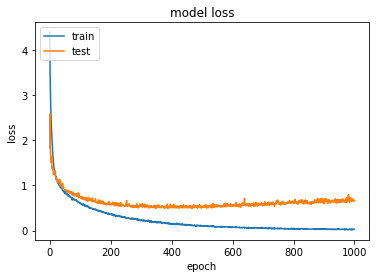

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()